# Week 10: Inheritance, abstraction, and crafting the public interface. 


Last week we looked at several examples of object oriented program design.


In [1]:
class Person(object):
    """A class definition for a person. The following attributes are supported:
    
    Attributes:
    name: A string representing the person's name.
    age: An integer representing the person's age."""

    mammal = True
    
    
    def __init__(self, name, age):
        """Return a Person object with name and age set to the values supplied"""
        self.name = name
        self.age = age
    
    
    def __str__(self):
        return '{0} who is {1} years old.'.format(self.name, self.age)


person1 = Person('Alice', 25)
person2 = Person('Bob', 30)

print(person1, person2)

Alice who is 25 years old. Bob who is 30 years old.


Before we go on a note of caution is needed for class attributes. Do you remember the strange fibonacci sequence function from our first class?

In [2]:
def next_fibonacci(status=[]):
    if len(status) < 2:
        status.append(1)
        return 1
    status.append(status[-2] + status[-1])
    return status[-1]

print(next_fibonacci(), next_fibonacci(), next_fibonacci(), next_fibonacci(), next_fibonacci(), next_fibonacci())

1 1 2 3 5 8


The same issue can happen with classes, only this is a much more common source of bugs.

If only using strings and numbers the behaviour will likely be much as you expect. However, if using a list, dictionary, or other similar type you may get a surprise.

In [3]:
class Person(object):
    """A class definition for a person. The following attributes are supported:
    
    Attributes:
    name: A string representing the person's name.
    age: An integer representing the person's age."""

    friends = []
    
    
    def __init__(self, name, age):
        """Return a Person object with name and age set to the values supplied"""
        self.name = name
        self.age = age
    
    
    def __str__(self):
        return '{0} who is {1} years old'.format(self.name, self.age)


person1 = Person('Alice', 25)
person2 = Person('Bob', 30)

person1.friends.append('Charlie')
person2.friends.append('Danielle')

print(person1.friends, person2.friends)

['Charlie', 'Danielle'] ['Charlie', 'Danielle']


Both of our objects point to the same instance of the list type so adding a new friend to either object shows up in both.

The solution to this is creating our *friends* attribute only at instantiation of the object. This can be done by creating it in the \_\_init\_\_ method.

In [4]:
class Person(object):
    """A class definition for a person. The following attributes are supported:
    
    Attributes:
    name: A string representing the person's name.
    age: An integer representing the person's age."""

    
    
    def __init__(self, name, age):
        """Return a Person object with name and age set to the values supplied"""
        self._name = name
        self.age = age
        self.friends = []
    
    
    def __str__(self):
        return '{0} who is {1} years old'.format(self.name, self.age)
    

person1 = Person('Alice', 25)
person2 = Person('Bob', 30)

person1.friends.append('Charlie')
person2.friends.append('Danielle')

print(person1.friends, person2.friends)

['Charlie'] ['Danielle']


Objects have their own namespace, although we have created variables called name, age, and friends they can only be accessed in the context of the object.

In [5]:
print('This works:', person1.friends)
print('This does not work:', friends)

This works: ['Charlie']


NameError: name 'friends' is not defined

We are not limited to special methods when creating classes. Standard functions, or in this context methods, are an integral part of object oriented programming. Their definition is identical to special methods and functions outside of classes.

In [6]:
class Person(object):
    """A class definition for a person. The following attributes are supported:
    
    Attributes:
    name: A string representing the person's name.
    age: An integer representing the person's age."""

    
    
    def __init__(self, name, age):
        """Return a Person object with name and age set to the values supplied"""
        self.name = name
        self.age = age
        self.friends = []
    
    
    def __str__(self):
        """Return a string representation of the object"""
        return '{0} who is {1} years old'.format(self.name, self.age)
    
    
    def add_friend(self, friend):
        """Add a friend"""
        self.friends.append(friend)

        
person1 = Person('Alice', 25)
person2 = Person('Bob', 30)

person1.add_friend('Charlie')
person2.add_friend('Danielle')

print(person1.friends, person2.friends)

['Charlie'] ['Danielle']


### Private vs Public

Some programming languages support hiding methods and attributes in an object. This can be useful to simplify the public interface someone using the class will see while still breaking up components into manageable blocks 'under-the-hood'. We will discuss designing the public interface in detail in future classes.

Python does not support private variables beyond convention. Names prefixed with a underscore are assumed to be private. This means they may be changed without warning between different versions of the package. For public attributes/methods this is highly discouraged.

In [7]:
# from module import * 

_internal_name = 'one_nodule' # private variable
_internal_version = '1.0' # private variable

class _Base: # private class
    _hidden_factor = 2 # private variable
    def __init__(self, price):
        self._price = price
    def _double_price(self): # private method
        return self._price * self._hidden_factor
    def get_double_price(self): # public interface
        return self._double_price() 

In [8]:
class A:
    def _single_method(self):
        pass
    def __double_method(self): # for mangling
        pass

class B(A):
    def __double_method(self): # for mangling
        pass

The mangling rule of Python is adding the “_ClassName” to front of attribute names are declared with double underscore. 
That is, if you write method named “__method” in a class, the name will be mangled in “_ClassName_ _ _method” form.

### Glossary

__Class__: Our definition, or template, for an object.

__Object__: An instance of a class.

__Method__: A function that belongs to an object

__Attribute__: A characteristic of an object, these can be data attributes and methods.

Now we will revisit the laboratory inventory system from last week.

### Example 1: A Laboratory Inventory

I would like to keep track of all the __items__ in the __laboratory__ so I can easily find them the next time I need them. Both __equipment__ and __consumables__ would be tracked. We have multiple __rooms__, and items can be on __shelves__, in __refrigerators__, in __freezers__, etc. Items can also be in __boxes__ containing other items in all these places.

The words in __bold__ would all be good ideas to turn into classes. Now we know some of the classes we will need we can start to think about what each of these classes should do, what the methods will be. Let's consider the consumables class:

For consumables we will need to manage their use so there should be an initial quantity and a quantity remaining that is updated every time we use some. We want to make sure that temperature sensitive consumables are always stored at the correct temperature, and that flammables are stored in a flammables cabinet etc.

The consumable class will need a number of attributes:

* Initial quantity
* Current quantity
* Storage temperature
* Flammability

The consumable class will need methods to:

* Update the quantity remaining
* Check for improper storage?

The consumable class might interact with the shelf, refrigerator, freezer, and/or box classes.

Reading back through our description of consumables there is reference to a flammables cabinet that was not mentioned in our initial description of the problem. This is an iterative design process so we should go back and add a flammables cabinet class. 

If we expand our list to all the classes we plan to use we get the following:

* __Items__
  * Attributes
    * Name
    * Description
    * Location
  * Methods
    * Update location
  * Interactions
    * Every other class except items and consumables
* __Laboratory__
  * Attributes
    * ?
  * Methods
    * Search
  * Interactions
    * Every other class
* __Equipment__
  * Attributes
    * Name
    * Description
    * Location
  * Methods
    * Update location
  * Interactions
    * Every other class except items and consumables
* __Consumables__
  * Attributes
    * Name
    * Description
    * Location
    * Initial quantity
    * Current quantity
    * Storage temperature
    * Flammability
  * Methods
    * Update location
    * Update quantity remaining
    * Check for appropriate storage
  * Interactions
    * Every other class except equipment and items
* __Rooms__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class
* __Shelves__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class possible although refrigerator and freezer are unlikely
* __Refrigerators__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
    * Temperature
  * Methods
    * Search
  * Interactions
    * Every other class possible although freezer and flammables cabinet unlikely
* __Freezers__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
    * Temperature
  * Methods
    * Search
  * Interactions
    * Every other class possible although refrigerator and flammables cabinet unlikely
* __Boxes__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class
* __Flammables Cabinet__
  * Attributes
    * Name
    * Description
    * Location
    * Storage locations within this location
    * Items stored here
  * Methods
    * Search
  * Interactions
    * Every other class possible although refrigerator and freezer unlikely

Although this is a long list careful examination reveals that there is a lot of repetition.

Items and equipment are identical and consumables is similar, adding several extra attributes and methods.

Rooms, shelves, refrigerators, freezers, boxes and flammables cabinet are all similar, only differing in the occasional attribute.

Our three main groups are:
* Laboratory
* Items (Items, equipment, and consumables)
* Locations (Rooms, shelves, refrigerators, freezers, boxes and flammables cabinet)

So much duplication is problematic, it is diffcult to maintain and subject to greater risk of bugs. 

## Inheritance

There is a better way - we can create a generic class with the shared functionality and then __inherit__ from it when we create the other classes.

For example an Item class would contain the basic attributes and methods. The Equipment class could then inherit from this class without modification. The Consumable class would also inherit from Item and only add the extra attributes and methods uniquely needed by the Consumable class.

In [9]:
class Item(object):
    
    
    def __init__(self, name, description, location):
        self.name = name
        self.description = description
        self.location = location
        
        
    def update_location(self, new_location):
        # self.location = new_location
        pass

class Equipment(Item):
    pass

class Consumable(Item):
    
    
    def __init__(self, name, description, location, initial_quantity, current_quantity, storage_temp, flammability):
        self.name = name
        self.description = description
        self.location = location
        self.initial_quantity = initial_quantity
        self.current_quantity = current_quantity
        self.flammability = flammability
        
        
    def update_quantity_remaining(self, amount):
        pass

Each of the classes we create inheriting from our general class can be thought of as having an 'is-a' relationship with the general class. For example, Equipment __is a__ Item, Consumable __is a__ Item.

### Not yet implemented methods

There is one other situation we should consider. Occasionally we will want a class of a particular type to always implement a particular method even though we are unable to implement that method in our parent class. We need some way of raising an error when the parent class is inherited and the method is not implemented.

Returning to our laboratory inventory system one way we can implement this is below:

In [10]:
class Item(object):
    def safely_stored(self):
        raise NotImplementedError('override in subclass')
        
class Consumable(Item):
    def safely_stored(self):
        return True

In [11]:
a = Item()

In [12]:
a.safely_stored()

NotImplementedError: override in subclass

In [13]:
b = Consumable()

In [14]:
b.safely_stored()

True

A disadvantage with this approach is we only see the error message when we call the method. The error is in the way we implemented the class so it would be more intuitive to get an error earlier, when we first create the object.

This can be achieved using the [abstract method decorator](https://docs.python.org/3.5/library/abc.html).

In [15]:
from abc import ABCMeta, abstractmethod

class Item(object, metaclass=ABCMeta):
    @abstractmethod
    def safely_stored(self):
        pass
    
    def test(self):
        pass

class Consumable(Item):
    def safely_stored(self):
        return True

In [16]:
a = Item()

TypeError: Can't instantiate abstract class Item with abstract methods safely_stored

In [17]:
b = Consumable()
b.safely_stored()

True

Either of these approaches work well for adding new methods or completely changing the behaviour of a method. Often we only need to make a more subtle change. In this situation it can be useful to call a method from a parent class while only implementing our new functionality in the child class.


There are two approaches for this.

In [45]:
class A(object):
    def a(self):
        print('a in class A')

class B(A):
    
    def a(self):
        A.a(self)
        print('b in class B')

a = A()
a.a()
print('----')
b = B()
b.a()

a in class A
----
a in class A
b in class B


In [19]:
class A(object):
    def a(self):
        print('a in class A')

class B(A):
    def a(self):
        super().a()
        print('b in class B')

a = A()
a.a()

b = B()
b.a()

a in class A
a in class A
b in class B


Using super() is usually the best approach, the reasons for this are covered in detail in [this blog post](https://rhettinger.wordpress.com/2011/05/26/super-considered-super/)

## Multiple Inheritance

We are not limited to inheriting from a single class. It is possible to merge functionality from multiple different classes simply by inheriting from them.

When inheriting from multiple classes that contain a method or attribute with the same name there is a particular order in which the names are resolved.

In [47]:
class Item(object):
    def move(self):
        print("item moved")

class Warranty(object):
    def claim(self, problem_description):
        # email_service(self.item_id, problem_description)
        print("reporting", problem_description)

class ItemUnderWarranty(Item, Warranty):
    pass

item = ItemUnderWarranty()
item.move()
item.claim("problem")


item moved
reporting problem


In [21]:
class A(object):
    def a(self):
        print('A-a')

class A2(object):
    def a(self):
        print('A2-a')

class B(A):
    pass

class C(B, A2):
    pass

a = A()
a.a()

a2 = A2()
a2.a()

c = C()
c.a()

A-a
A2-a
A-a


A simple rule-of-thumb is that search is depth first. [The details](https://en.wikipedia.org/wiki/C3_linearization) are a little more complicated.

## isinstance

Often we need to check whether a particular variable is an instance of a particular class. For example, returning to our laboratory inventory system we would want to check that we only add instances of `Item` or its subclasses to our storage locations.

In [22]:
class Item(object):
    def safely_stored(self):
        raise NotImplementedError('override in subclass')
        
class Consumable(Item):
    def safely_stored(self):
        return True
    
a = Item()
b = Consumable()

print('a instance of Item:', isinstance(a, Item))
print('b instance of Consumable:', isinstance(b, Consumable))
print('b instance of Item:', isinstance(b, Item))
print('a instance of Consumable:', isinstance(a, Consumable))

a instance of Item: True
b instance of Consumable: True
b instance of Item: True
a instance of Consumable: False


## Duck typing

A popular alternative in python is duck typing, an approach named after the idea that,

`If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck.`

What this means for programming is that instead of checking for a particular class, instead the methods and attributes that are actually needed are checked for.

if hasattr(obj,method) and callable(getattr(obj,method)):
  pass

item moved


## Composition

Let's switch to another example from last week. We looked at a cookbook application and were often unsure whether things like ingredients should be attributes on the recipe class or classes in their own right. 

Often the answer is both. 

These are the interactions that change a collection of different classes into a functioning program. This is called __composition__. The Recipe object is a composite object, it __has__ ingredients, it __has__ instructions, etc.

Let's look at how we can design our classes to be easy to use, for both programmer-class and class-class interactions.

In [23]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.carbs = carbs
        self.protein = protein
        self.fat = fat
        
    
    def get_nutrition(self):
        """Returns the nutritional information for the ingredient"""
        return (self.carbs, self.protein, self.fat)
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
        
    def get_nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = [0, 0, 0]
        for amount, ingredient in self.ingredients:
            nutrition[0] += amount * ingredient.carbs
            nutrition[1] += amount * ingredient.protein
            nutrition[2] += amount * ingredient.fat
        return nutrition
    

bread = Recipe('Bread', [(820, Ingredient('Flour', 0.77, 0.10, 0.01)), 
                         (30, Ingredient('Oil', 0, 0, 1)), 
                         (36, Ingredient('Sugar', 1, 0, 0)), 
                         (7, Ingredient('Yeast', 0.3125, 0.5, 0.0625)),
                         (560, Ingredient('Water', 0, 0, 0))])
print(bread.ingredients)
print(bread.get_nutrition())

[(820, <__main__.Ingredient object at 0x107b1f358>), (30, <__main__.Ingredient object at 0x107b1f6a0>), (36, <__main__.Ingredient object at 0x107b1f5f8>), (7, <__main__.Ingredient object at 0x107b1f630>), (560, <__main__.Ingredient object at 0x107b1f588>)]
[669.5875, 85.5, 38.6375]


This has the basic functionality implemented but there are some improvements we can make. 

Before we look at making changes we can seek inspiration. [Requests](http://docs.python-requests.org/en/master/#) and [Pandas](http://pandas.pydata.org/) are two packages well regarded for having well implemented interfaces.

### Requests: HTTP for Humans

Requests is a package used for making HTTP requests. There are options in the python standard library for making http requests but they can seem difficult to use. 

In [24]:
import requests


In [57]:
r = requests.get('https://api.github.com/repos/biof509/biof509-fall2017/events')
print(r.status_code, r.ok)
print(r.headers['content-type'])


200 True
application/json; charset=utf-8


In [26]:
print(r.text[:1000])

[{"id":"6831998335","type":"PushEvent","actor":{"id":736229,"login":"streety","display_login":"streety","gravatar_id":"","url":"https://api.github.com/users/streety","avatar_url":"https://avatars.githubusercontent.com/u/736229?"},"repo":{"id":102967034,"name":"biof509/biof509-fall2017","url":"https://api.github.com/repos/biof509/biof509-fall2017"},"payload":{"push_id":2111932313,"size":1,"distinct_size":1,"ref":"refs/heads/master","head":"819a52241d42ecd6e374f6ce0e7db46dadd09eef","before":"90e03b3568b00aa14f66a176f4d6ee7826c06249","commits":[{"sha":"819a52241d42ecd6e374f6ce0e7db46dadd09eef","author":{"email":"jonathan@jonathanstreet.com","name":"Jonathan Street"},"message":"Adding week 9 material","distinct":true,"url":"https://api.github.com/repos/biof509/biof509-fall2017/commits/819a52241d42ecd6e374f6ce0e7db46dadd09eef"}]},"public":true,"created_at":"2017-11-09T13:07:46Z","org":{"id":25420075,"login":"biof509","gravatar_id":"","url":"https://api.github.com/orgs/biof509","avatar_url":

In [66]:
print(r.json()[5]['payload']['commits'][0]['author']['name'])

Jonathan Street


In [28]:
type(r)

requests.models.Response

[The API documentation for requests](http://docs.python-requests.org/en/master/api/)

[The Response class](https://github.com/kennethreitz/requests/blob/master/requests/models.py#L581)

Some useful features:

* [property](https://github.com/kennethreitz/requests/blob/master/requests/models.py#L685)


### Pandas

    pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and 
    data analysis tools for the Python programming language.

In [29]:
import pandas as pd

In [30]:
data = pd.DataFrame([[0,1,2,3], [4,5,6,7], [8,9,10,11]], 
                    index=['a', 'b', 'c'], 
                    columns=['col1', 'col2', 'col3', 'col4'])
data

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [31]:
print(data.shape)
print(data['col1'])
print(data.col1)

(3, 4)
a    0
b    4
c    8
Name: col1, dtype: int64
a    0
b    4
c    8
Name: col1, dtype: int64


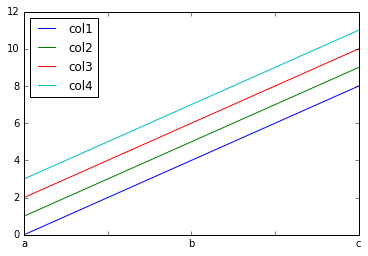

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

data.plot()

In [44]:
data.to_csv('Wk10-temp.csv')

data2 = pd.DataFrame.from_csv('Wk10-temp.csv', index_col=0)
data2

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


[The API documentation for the DataFrame object](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

[The actual code](https://github.com/pydata/pandas/blob/master/pandas/core/frame.py).

Some useful features:
* [classmethod](https://github.com/pandas-dev/pandas/blob/master/pandas/core/frame.py#L1202)
* [property](https://github.com/pandas-dev/pandas/blob/master/pandas/core/frame.py#L631) for html styling and [property](https://github.com/pandas-dev/pandas/blob/master/pandas/core/generic.py#L491) for shape
* [`__getitem__`](https://github.com/pandas-dev/pandas/blob/master/pandas/core/frame.py#L2047)
* [Public and private attributes/methods](https://github.com/pandas-dev/pandas/blob/master/pandas/core/frame.py#L498)
* [`__getattr__`](https://github.com/pandas-dev/pandas/blob/master/pandas/core/generic.py#L2947)

### Cookbook

We can now return to our cookbook example.

Displaying the ingredients needs to be improved.

In [34]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.carbs = carbs
        self.protein = protein
        self.fat = fat
        
    
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, self.carbs, self.protein, self.fat)
    
    
    def get_nutrition(self):
        """Returns the nutritional information for the ingredient"""
        return (self.carbs, self.protein, self.fat)
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
        
    def get_nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = [0, 0, 0]
        for amount, ingredient in self.ingredients:
            nutrition[0] += amount * ingredient.carbs
            nutrition[1] += amount * ingredient.protein
            nutrition[2] += amount * ingredient.fat
        return nutrition
    

bread = Recipe('Bread', [(820, Ingredient('Flour', 0.77, 0.10, 0.01)), 
                         (30, Ingredient('Oil', 0, 0, 1)), 
                         (36, Ingredient('Sugar', 1, 0, 0)), 
                         (7, Ingredient('Yeast', 0.3125, 0.5, 0.0625)),
                         (560, Ingredient('Water', 0, 0, 0))])
print(bread.ingredients)
print(bread.get_nutrition())

[(820, Ingredient(Flour, 0.77, 0.1, 0.01)), (30, Ingredient(Oil, 0, 0, 1)), (36, Ingredient(Sugar, 1, 0, 0)), (7, Ingredient(Yeast, 0.3125, 0.5, 0.0625)), (560, Ingredient(Water, 0, 0, 0))]
[669.5875, 85.5, 38.6375]


Viewing the ingredients now looks much better. Let's now look at the get_nutrition method.

There are still a number of areas that could be improved

* When we call get_nutrition it is not clear what the different values returned actually are
* We don't use the get_nutrition method when calculating the nutrition values in the Recipe class
* There is no way to add additional types of nutrient
* Ingredient and Recipe return different types from get_nutrition, tuple and list respectively
* Recipe could not be used as an ingredient for another Recipe

In [35]:
class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, nutrition):
        self.name = name
        self.nutrition = nutrition

        
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, 
                                                       self.nutrition['carbs'], 
                                                       self.nutrition['protein'], 
                                                       self.nutrition['fat'])
    
    
    

class Recipe(object):
    """The Recipe object containing the ingredients"""
    
    def __init__(self, name, ingredients):
        self.name = name
        self.ingredients = ingredients
        
    @property
    def nutrition(self):
        """Returns the nutritional information for the recipe"""
        nutrition = {}
        for amount, ingredient in self.ingredients:
            # use get_nutrition
            for k,v in ingredient.nutrition.items():
                nutrition[k] = amount * v + nutrition.get(k, 0)
        return nutrition
    

bread = Recipe('Bread', [(820, Ingredient('Flour', {'carbs':0.77, 
                                                    'protein':0.10, 
                                                    'fat':0.01})), 
                         (30, Ingredient('Oil', {'carbs':0, 
                                                    'protein':0, 
                                                    'fat':1})), 
                         (36, Ingredient('Sugar', {'carbs':1, 
                                                    'protein':0, 
                                                    'fat':0})), 
                         (7, Ingredient('Yeast', {'carbs':0.3125, 
                                                    'protein':0.5, 
                                                    'fat':0.0625})),
                        (560, Ingredient('Water', {'carbs':0, 
                                                    'protein':0, 
                                                    'fat':0})),
                        ])
print(bread.ingredients)
print(bread.nutrition)

[(820, Ingredient(Flour, 0.77, 0.1, 0.01)), (30, Ingredient(Oil, 0, 0, 1)), (36, Ingredient(Sugar, 1, 0, 0)), (7, Ingredient(Yeast, 0.3125, 0.5, 0.0625)), (560, Ingredient(Water, 0, 0, 0))]
{'fat': 38.6375, 'protein': 85.5, 'carbs': 669.5875}


In [36]:
# Recipe and Ingredient now have a consistent interface and we can combine them.

# Recipe for toast - add butter to a 12th of a loaf

toast = Recipe('Toast', [(1/12, bread),
                        (25, Ingredient('Butter', {'carbs':0,
                                                  'protein':0,
                                                  'fat':1}))])
print(toast.nutrition)

{'fat': 28.219791666666666, 'protein': 7.125, 'carbs': 55.79895833333333}


In [37]:
# We can also add additional types of nutrients

bread = Recipe('Bread', [(820, Ingredient('Flour', {'carbs':0.77, 
                                                    'protein':0.10, 
                                                    'fat':0.01,
                                                    'sodium':0.00002})), 
                         (30, Ingredient('Oil', {'carbs':0, 
                                                    'protein':0, 
                                                    'fat':1,
                                                    'sodium':0.00002})), 
                         (36, Ingredient('Sugar', {'carbs':1, 
                                                    'protein':0, 
                                                    'fat':0,
                                                    'sodium':0})), 
                         (7, Ingredient('Yeast', {'carbs':0.3125, 
                                                    'protein':0.5, 
                                                    'fat':0.0625,
                                                    'sodium':0.00050})),
                        (560, Ingredient('Water', {'carbs':0, 
                                                    'protein':0, 
                                                    'fat':0,
                                                    'sodium':0})),
                        ])
print(bread.ingredients)
print(bread.nutrition)

[(820, Ingredient(Flour, 0.77, 0.1, 0.01)), (30, Ingredient(Oil, 0, 0, 1)), (36, Ingredient(Sugar, 1, 0, 0)), (7, Ingredient(Yeast, 0.3125, 0.5, 0.0625)), (560, Ingredient(Water, 0, 0, 0))]
{'fat': 38.6375, 'protein': 85.5, 'carbs': 669.5875, 'sodium': 0.0205}


In [38]:
# If we want to accept nutritional information either as a dictionary or the older style numerical values we have 
# a few options

# First, an alternate entry point using the @classmethod decorator

class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein, fat):
        self.name = name
        self.nutrition = {'carbs': carbs,
                         'protein': protein,
                         'fat': fat}
        
    
    @classmethod
    def from_dict(cls, name, nutrition):
        ingredient = cls(name, 0, 0, 0)
        ingredient.nutrition = nutrition
        return ingredient
        
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, 
                                                       self.nutrition['carbs'], 
                                                       self.nutrition['protein'], 
                                                       self.nutrition['fat'])

# Creating an ingredient instance using the from_dict method
a = Ingredient.from_dict('Flour', {'carbs':0.77, 
                        'protein':0.10, 
                        'fat':0.01,
                        'sodium':0.00002})
print(a)

# Creating an ingredient instance using the __init__ method
b = Ingredient('Flour', 0.77, 0.10, 0.01,)
print(b)

Ingredient(Flour, 0.77, 0.1, 0.01)
Ingredient(Flour, 0.77, 0.1, 0.01)


In [39]:
# Second we can alter the __init__ method to accept either numerical values or a dictionary

# Default values are used below. A similar solution could be implemented using the *args and/or **kwargs functionality

class Ingredient(object):
    """The ingredient object that contains nutritional information"""
    
    def __init__(self, name, carbs, protein=None, fat=None):
        self.name = name
        if isinstance(carbs, dict):
            self.nutrition = carbs
        elif isinstance(carbs, float) or isinstance(carbs, int):
            self.nutrition = {'carbs': carbs,
                         'protein': protein,
                         'fat': fat}
        else:
            raise Exception('Unexpected argument types supplied')
        
        
    def __repr__(self):
        return 'Ingredient({0}, {1}, {2}, {3})'.format(self.name, 
                                                       self.nutrition['carbs'], 
                                                       self.nutrition['protein'], 
                                                       self.nutrition['fat'])

# Creating an ingredient instance using a dictionary
a = Ingredient('Flour', {'carbs':0.77, 
                        'protein':0.10, 
                        'fat':0.01,
                        'sodium':0.00002})
print(a)

# Creating an ingredient instance using numercal values
b = Ingredient('Flour', 0.77, 0.10, 0.01,)
print(b)

Ingredient(Flour, 0.77, 0.1, 0.01)
Ingredient(Flour, 0.77, 0.1, 0.01)


In [40]:
a = {'x':1, 'y':2}
a['x']

1

In [41]:
a.get('x')

1

In [42]:
a['z']

KeyError: 'z'

In [43]:
a.get('z', 0)

0

In [ ]:
from recipes import Bread
from ingredients import Flour, Water

class Ingredient(object):
    def __init(name, **nutr):
        self.name = name
        self.nutr = nutr

# class Bread(Recipe):
#     pass
# class Flour(Ingredient):
#     pass

flour = Ingredient('Flour', fat=0.3, protein=.2, carbs=15)

bread = Bread((0.5, flour), (0.7, fater))
print(bread.nutricients())

name = user_input('Enter name')
prot = user_input('Protein?')
carb = user_input('')
fat = user_input('')
new_ingredient = Ingredient(name, protein=prot, carbs=carb, fat=fat)









